# Training the LightGBM Model for Forecasting Fuel Load in Tropics
This notebooks demonstrates training a LightGBM model with hyperparameter optimization, followed by feature importance visualization using SHAP. LightGBM is a gradient boosting framework that uses tree based learning algorithms. This notebook utilizes the `deepfuel-ML/src/models/lightgbm_module.py` script for model training.

In [1]:
import os
import pandas as pd
import numpy as np
from joblib import dump, load
import shap

### Data directory

In [2]:
# The training, validation and test set required for model training are placed in data/tropics/
! tree ../data/tropics

../data/tropics
├── tropics_test.csv
├── tropics_train.csv
└── tropics_val.csv

0 directories, 3 files


### Input Features

- Latitude
- Longitude
- Fire Weather Index: fwinx
- Drought Code: drtcode
- Fire Danegr Severity Rating: fdsrte
- Fraction of Burnable Area: fraction_of_burnable_area
- d2m
- Evaporation Rate: erate
- fg10
- si10
- Volumetric Soil Water Level 1: swvl1
- 2m Temperature: t2m
- tprate
- Climatic Region: climatic_region
- Slope: slor
- Month: month
- Fuel Load: actual_load (target variable)

In [3]:
# Check header of training set matches input features
! head -n 1 ../data/tropics/tropics_train.csv

latitude,longitude,fwinx,drtcode,fdsrte,fraction_of_burnable_area,d2m,erate,fg10,si10,swvl1,t2m,tprate,climatic_region,slor,actual_load,month


### Model Training

In [4]:
!python  '../src/train.py'  --model_name 'LightGBM' --data_path '../data/tropics'  --exp_name 'LightGBM_exp'

Link for the created Neptune experiment--------
Info (NVML): NVML Shared Library Not Found. GPU usage metrics may not be reported. For more information, see https://docs.neptune.ai/logging-and-managing-experiment-results/logging-experiment-data.html#hardware-consumption 
https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-168
---------------------------------------
/Users/rbiswas/miniconda3/envs/smos-fuel/lib/python3.8/site-packages/lightgbm/engine.py:156: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
[LightGBM] [Warning] Unknown parameter: lamda_l2
[LightGBM] [Warning] Unknown parameter: lamda_l1
[LightGBM] [Warning] Unknown parameter: lamda_l2
[LightGBM] [Warning] Unknown parameter: lamda_l1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005887 seconds.
You can set `force_row_wise=true` to r

[126]	train's rmse: 2.7454e+09	val's rmse: 4.37488e+09
[127]	train's rmse: 2.74002e+09	val's rmse: 4.37412e+09
[128]	train's rmse: 2.7361e+09	val's rmse: 4.37193e+09
[129]	train's rmse: 2.73178e+09	val's rmse: 4.37203e+09
[130]	train's rmse: 2.72808e+09	val's rmse: 4.37018e+09
[131]	train's rmse: 2.72447e+09	val's rmse: 4.36881e+09
[132]	train's rmse: 2.72072e+09	val's rmse: 4.36673e+09
[133]	train's rmse: 2.71755e+09	val's rmse: 4.36615e+09
[134]	train's rmse: 2.71255e+09	val's rmse: 4.36287e+09
[135]	train's rmse: 2.7088e+09	val's rmse: 4.36134e+09
[136]	train's rmse: 2.70368e+09	val's rmse: 4.35933e+09
[137]	train's rmse: 2.69928e+09	val's rmse: 4.35687e+09
[138]	train's rmse: 2.6951e+09	val's rmse: 4.35508e+09
[139]	train's rmse: 2.69062e+09	val's rmse: 4.3527e+09
[140]	train's rmse: 2.68533e+09	val's rmse: 4.34955e+09
[141]	train's rmse: 2.68129e+09	val's rmse: 4.34788e+09
[142]	train's rmse: 2.67717e+09	val's rmse: 4.34534e+09
[143]	train's rmse: 2.67299e+09	val's rmse: 4.34357e+

[273]	train's rmse: 2.29059e+09	val's rmse: 4.18207e+09
[274]	train's rmse: 2.28894e+09	val's rmse: 4.18204e+09
[275]	train's rmse: 2.28659e+09	val's rmse: 4.18088e+09
[276]	train's rmse: 2.28423e+09	val's rmse: 4.17937e+09
[277]	train's rmse: 2.28187e+09	val's rmse: 4.17875e+09
[278]	train's rmse: 2.27938e+09	val's rmse: 4.17723e+09
[279]	train's rmse: 2.27692e+09	val's rmse: 4.1748e+09
[280]	train's rmse: 2.27457e+09	val's rmse: 4.17397e+09
[281]	train's rmse: 2.27228e+09	val's rmse: 4.172e+09
[282]	train's rmse: 2.26992e+09	val's rmse: 4.17089e+09
[283]	train's rmse: 2.26754e+09	val's rmse: 4.16935e+09
[284]	train's rmse: 2.26611e+09	val's rmse: 4.16902e+09
[285]	train's rmse: 2.26402e+09	val's rmse: 4.1681e+09
[286]	train's rmse: 2.26174e+09	val's rmse: 4.16757e+09
[287]	train's rmse: 2.26033e+09	val's rmse: 4.16712e+09
[288]	train's rmse: 2.25891e+09	val's rmse: 4.16672e+09
[289]	train's rmse: 2.25651e+09	val's rmse: 4.16657e+09
[290]	train's rmse: 2.25446e+09	val's rmse: 4.1656e+

[420]	train's rmse: 2.0395e+09	val's rmse: 4.08874e+09
[421]	train's rmse: 2.03829e+09	val's rmse: 4.08852e+09
[422]	train's rmse: 2.03706e+09	val's rmse: 4.08877e+09
[423]	train's rmse: 2.03561e+09	val's rmse: 4.08853e+09
[424]	train's rmse: 2.03418e+09	val's rmse: 4.08839e+09
[425]	train's rmse: 2.03281e+09	val's rmse: 4.08869e+09
[426]	train's rmse: 2.03188e+09	val's rmse: 4.08855e+09
[427]	train's rmse: 2.03042e+09	val's rmse: 4.0882e+09
[428]	train's rmse: 2.02896e+09	val's rmse: 4.08787e+09
[429]	train's rmse: 2.02781e+09	val's rmse: 4.08778e+09
[430]	train's rmse: 2.0265e+09	val's rmse: 4.08761e+09
[431]	train's rmse: 2.025e+09	val's rmse: 4.08712e+09
[432]	train's rmse: 2.02356e+09	val's rmse: 4.08692e+09
[433]	train's rmse: 2.0222e+09	val's rmse: 4.08651e+09
[434]	train's rmse: 2.02098e+09	val's rmse: 4.08603e+09
[435]	train's rmse: 2.01956e+09	val's rmse: 4.08561e+09
[436]	train's rmse: 2.01797e+09	val's rmse: 4.08463e+09
[437]	train's rmse: 2.01698e+09	val's rmse: 4.08436e+0

[567]	train's rmse: 1.88409e+09	val's rmse: 4.05047e+09
[568]	train's rmse: 1.88324e+09	val's rmse: 4.05026e+09
[569]	train's rmse: 1.88238e+09	val's rmse: 4.04995e+09
[570]	train's rmse: 1.8817e+09	val's rmse: 4.0499e+09
[571]	train's rmse: 1.88092e+09	val's rmse: 4.04981e+09
[572]	train's rmse: 1.88015e+09	val's rmse: 4.04976e+09
[573]	train's rmse: 1.87931e+09	val's rmse: 4.04967e+09
[574]	train's rmse: 1.87862e+09	val's rmse: 4.04942e+09
[575]	train's rmse: 1.87781e+09	val's rmse: 4.04943e+09
[576]	train's rmse: 1.87707e+09	val's rmse: 4.04951e+09
[577]	train's rmse: 1.87625e+09	val's rmse: 4.04916e+09
[578]	train's rmse: 1.87535e+09	val's rmse: 4.04893e+09
[579]	train's rmse: 1.87478e+09	val's rmse: 4.04896e+09
[580]	train's rmse: 1.87408e+09	val's rmse: 4.04904e+09
[581]	train's rmse: 1.87337e+09	val's rmse: 4.04898e+09
[582]	train's rmse: 1.87271e+09	val's rmse: 4.04886e+09
[583]	train's rmse: 1.87188e+09	val's rmse: 4.04853e+09
[584]	train's rmse: 1.87117e+09	val's rmse: 4.0485

[714]	train's rmse: 1.7918e+09	val's rmse: 4.0365e+09
[715]	train's rmse: 1.79122e+09	val's rmse: 4.03622e+09
[716]	train's rmse: 1.79067e+09	val's rmse: 4.03621e+09
[717]	train's rmse: 1.78994e+09	val's rmse: 4.03593e+09
[718]	train's rmse: 1.78944e+09	val's rmse: 4.03586e+09
[719]	train's rmse: 1.789e+09	val's rmse: 4.03574e+09
[720]	train's rmse: 1.78849e+09	val's rmse: 4.03574e+09
[721]	train's rmse: 1.78788e+09	val's rmse: 4.03551e+09
[722]	train's rmse: 1.78728e+09	val's rmse: 4.03511e+09
[723]	train's rmse: 1.78674e+09	val's rmse: 4.03487e+09
[724]	train's rmse: 1.78588e+09	val's rmse: 4.03501e+09
[725]	train's rmse: 1.78526e+09	val's rmse: 4.03501e+09
[726]	train's rmse: 1.78467e+09	val's rmse: 4.03478e+09
[727]	train's rmse: 1.78417e+09	val's rmse: 4.03444e+09
[728]	train's rmse: 1.78361e+09	val's rmse: 4.03432e+09
[729]	train's rmse: 1.78322e+09	val's rmse: 4.03429e+09
[730]	train's rmse: 1.78294e+09	val's rmse: 4.03431e+09
[731]	train's rmse: 1.78248e+09	val's rmse: 4.03442e

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[856]	train's rmse: 1.73062e+09	val's rmse: 4.02738e+09
[857]	train's rmse: 1.73021e+09	val's rmse: 4.02737e+09
[858]	train's rmse: 1.72984e+09	val's rmse: 4.02752e+09
[859]	train's rmse: 1.72933e+09	val's rmse: 4.02754e+09
[860]	train's rmse: 1.72896e+09	val's rmse: 4.0275e+09
[861]	train's rmse: 1.72886e+09	val's rmse: 4.02748e+09
[862]	train's rmse: 1.72865e+09	val's rmse: 4.02745e+09
[863]	train's rmse: 1.72809e+09	val's rmse: 4.02735e+09
[864]	train's rmse: 1.7276e+09	val's rmse: 4.02742e+09
[865]	train's rmse: 1.72715e+09	val's rmse: 4.02734e+09
[866]	train's rmse: 1.72676e+09	val's rmse: 4.02722e+09
[867]	train's rmse: 1.72665e+09	val's rmse: 4.02717e+09
[868]	train's rmse: 1.72616e+09	val's rmse: 4.02703e+09
[869]	train's rmse: 1.72569e+09	val's rmse: 4.02681e+09
[870]	train's rmse: 1.72525e+09	val's rmse: 4.02672e+09
[871]	train's rmse: 1.72475e+09	val's rmse: 4.02658e+09
[872]	train's rmse: 1.72417e+09

[993]	train's rmse: 1.68036e+09	val's rmse: 4.01918e+09
[994]	train's rmse: 1.67961e+09	val's rmse: 4.01896e+09
[995]	train's rmse: 1.67926e+09	val's rmse: 4.01904e+09
[996]	train's rmse: 1.67892e+09	val's rmse: 4.019e+09
[997]	train's rmse: 1.67839e+09	val's rmse: 4.01888e+09
[998]	train's rmse: 1.678e+09	val's rmse: 4.01878e+09
[999]	train's rmse: 1.67761e+09	val's rmse: 4.01872e+09
[1000]	train's rmse: 1.67747e+09	val's rmse: 4.01866e+09
[1001]	train's rmse: 1.67688e+09	val's rmse: 4.01857e+09
[1002]	train's rmse: 1.67668e+09	val's rmse: 4.0185e+09
[1003]	train's rmse: 1.67629e+09	val's rmse: 4.01842e+09
[1004]	train's rmse: 1.67596e+09	val's rmse: 4.01843e+09
[1005]	train's rmse: 1.67529e+09	val's rmse: 4.01835e+09
[1006]	train's rmse: 1.67494e+09	val's rmse: 4.0184e+09
[1007]	train's rmse: 1.6748e+09	val's rmse: 4.0184e+09
[1008]	train's rmse: 1.67451e+09	val's rmse: 4.01861e+09
[1009]	train's rmse: 1.67419e+09	val's rmse: 4.01855e+09
[1010]	train's rmse: 1.67379e+09	val's rmse: 4

[1135]	train's rmse: 1.63581e+09	val's rmse: 4.01345e+09
[1136]	train's rmse: 1.6356e+09	val's rmse: 4.01344e+09
[1137]	train's rmse: 1.63534e+09	val's rmse: 4.01332e+09
[1138]	train's rmse: 1.63505e+09	val's rmse: 4.01334e+09
[1139]	train's rmse: 1.63499e+09	val's rmse: 4.01326e+09
[1140]	train's rmse: 1.63473e+09	val's rmse: 4.01328e+09
[1141]	train's rmse: 1.63445e+09	val's rmse: 4.01325e+09
[1142]	train's rmse: 1.63418e+09	val's rmse: 4.01329e+09
[1143]	train's rmse: 1.63394e+09	val's rmse: 4.01318e+09
[1144]	train's rmse: 1.63366e+09	val's rmse: 4.01311e+09
[1145]	train's rmse: 1.63345e+09	val's rmse: 4.01311e+09
[1146]	train's rmse: 1.6332e+09	val's rmse: 4.013e+09
[1147]	train's rmse: 1.63283e+09	val's rmse: 4.01302e+09
[1148]	train's rmse: 1.63259e+09	val's rmse: 4.01294e+09
[1149]	train's rmse: 1.6324e+09	val's rmse: 4.01294e+09
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1150]	train's rmse: 1.63228e+09	val's rmse: 4.01292e+09
[1151]	train's rms

Training logs can be viewed live at the following link: https://ui.neptune.ai/shared/step-by-step-monitoring-experiments-live/e/STEP-165

### Loading the trained model

In [5]:
model = load('../src/results/pre-trained_models/LightGBM.joblib')

### Feature importance using SHAP
[SHAP](https://github.com/slundberg/shap) (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions

In [6]:
tropic_val = pd.read_csv('../data/tropics/tropics_val.csv')

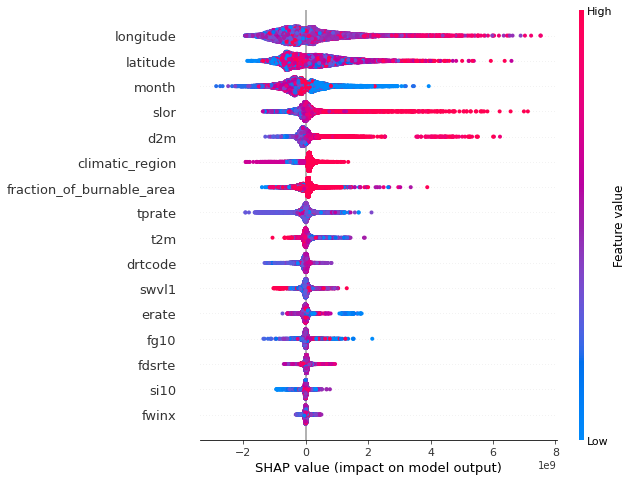

In [7]:
shap_values = shap.Explainer(model).shap_values(tropic_val.drop(['actual_load'],axis=1))
shap.summary_plot(shap_values, tropic_val.drop(['actual_load'],axis=1))

The y-axis indicates the variable name, in order of importance from top to bottom.
On the x-axis (Impact on model output), the horizontal location shows whether the effect of that value is associated with a higher or lower prediction. Gradient colour indicates feature value.